## Data Preprocessing for Classifier

In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from matplotlib.ticker import PercentFormatter
from matplotlib import pyplot as plt


#import missingno as msno 
#!pip install missingno



## Show added columns

Shape: (889, 13)


Index(['Unnamed: 0', 'Unnamed: 0.1', 'Survived', 'Pclass', 'Fancy', 'Male',
       'Age', 'Fare', 'Known', 'familyMembers', 'E_C', 'E_Q', 'E_S'],
      dtype='object')
AxesSubplot(0.125,0.125;0.775x0.755)


,Unnamed: 0,Unnamed: 0.1,Survived,Pclass,Fancy,Male,Age,Fare,Known,familyMembers,E_C,E_Q,E_S
884,884,886,0,2,1,1,27.0,13.00,0,0,0,0,1
885,885,887,1,1,0,0,19.0,30.00,1,0,0,0,1
886,886,888,0,3,0,0,30.0,23.45,0,3,0,0,1
887,887,889,1,1,0,1,26.0,30.00,1,0,1,0,0
888,888,890,0,3,0,1,32.0,7.75,0,0,0,1,0


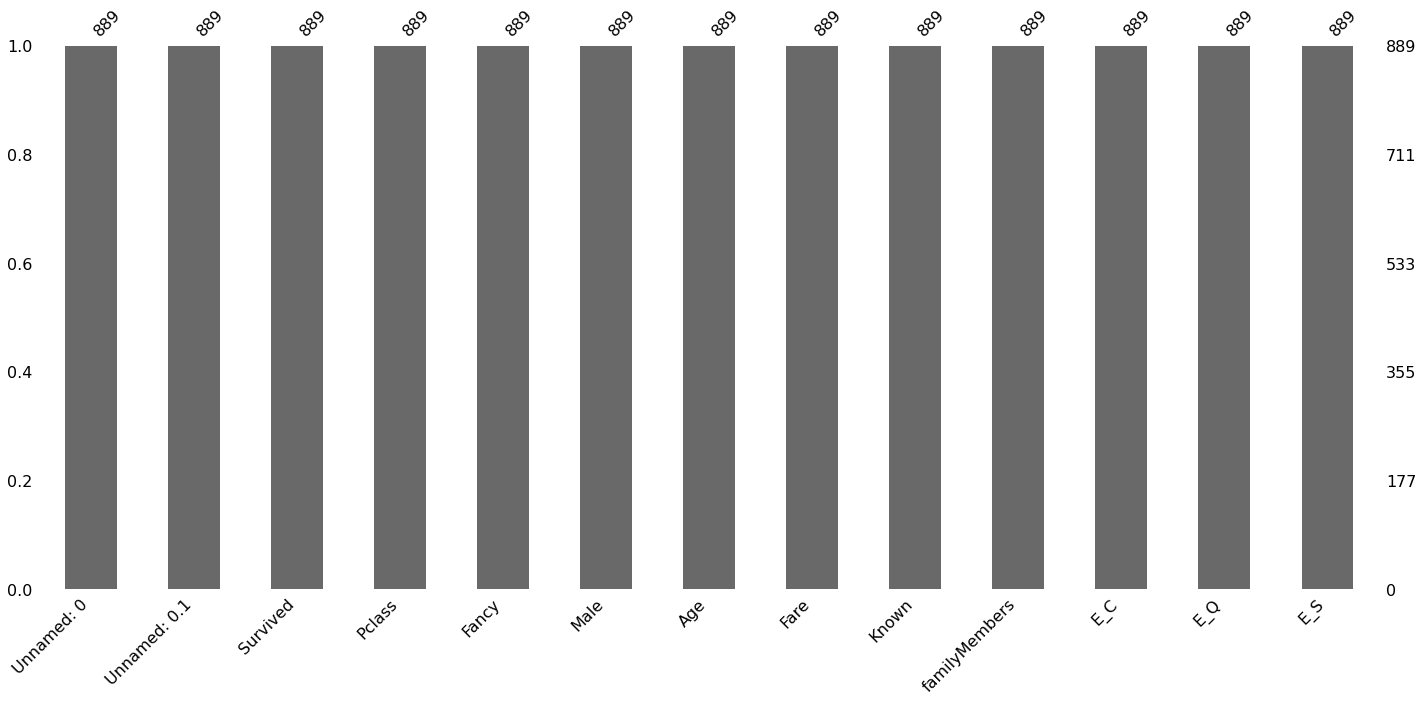

In [2]:
df = pd.read_csv('goodCleaned.csv')
print("Shape: " + str(df.shape))
print()
df.head()
print()
print(df.columns)


import missingno as msno 
print(msno.bar(df))

df.tail()

## Drop it

In [3]:
to_drop = ['Unnamed: 0.1', 'Unnamed: 0']

df.drop(to_drop, inplace = True, axis = 1) #or: df.drop(columns = to_drop, inplace = True)


#new_names = {'Unnamed: 0': 'Identifier'}
#df = df.rename(columns=new_names, inplace=True)
#df = df.set_index('Unnamed: 0', inplace=True)


df.head()

,Survived,Pclass,Fancy,Male,Age,Fare,Known,familyMembers,E_C,E_Q,E_S
0,0,3,0,1,22.0,7.2500,0,1,0,0,1
1,1,1,0,0,38.0,71.2833,1,1,1,0,0
2,1,3,0,0,26.0,7.9250,0,0,0,0,1
3,1,1,0,0,35.0,53.1000,1,1,0,0,1
4,0,3,0,1,35.0,8.0500,0,0,0,0,1


## Reordering columns and split data into dependent and independent variables

In [4]:
df = df[['Pclass', 'Fancy', 'Male', 'Age', 'Fare', 'Known', 'familyMembers', 'E_C', 'E_Q', 'E_S', 'Survived']]

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

df.head()

,Pclass,Fancy,Male,Age,Fare,Known,familyMembers,E_C,E_Q,E_S,Survived
0,3,0,1,22.0,7.2500,0,1,0,0,1,0
1,1,0,0,38.0,71.2833,1,1,1,0,0,1
2,3,0,0,26.0,7.9250,0,0,0,0,1,1
3,1,0,0,35.0,53.1000,1,1,0,0,1,1
4,3,0,1,35.0,8.0500,0,0,0,0,1,0


## Scaling Pclass, Age, Fare, familyMembers

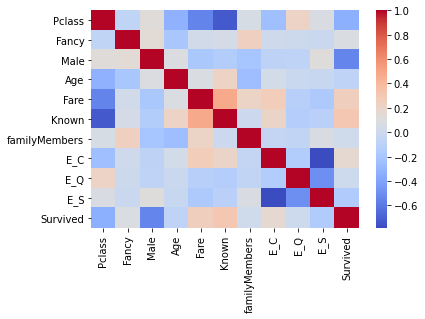

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

from sklearn.model_selection import train_test_split 
from sklearn import metrics 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train[:, 0:6] = sc.fit_transform(X_train[:, 0:6]) #sclale the features in train-set e.g with normalization
X_test[:, 0:6] = sc.transform(X_test[:, 0:6]) # apply this exact scaling of the train set to the test set

import seaborn as sns
import matplotlib.pyplot as plt

#corr2 = df2.corr()
correlations = df.corr()
#correlations
#sns.heatmap(corr2)
sns.heatmap(correlations,annot=False, cmap='coolwarm')
plt.show()

## Logistic Regression Classifier

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#pipe = make_pipeline(StandardScaler(), LogisticRegression())
#pipe.fit(X_train, y_train)  # apply scaling on training data

print("Accuracy: ")
#pipe.score(X_test, y_test)

lR = LogisticRegression()
lR.fit(X_train, y_train)

predictions = lR.predict(X_test)
score = lR.score(X_test, y_test)
print(score)


Accuracy: 
0.8426966292134831


## Decision Tree Classifier

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import seaborn as sns
from sklearn.tree import plot_tree

dtc = DecisionTreeClassifier(criterion = 'gini') #entropy worse than gini

dtc = dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#plot_tree(dtc)

Accuracy: 0.8127340823970037


## SVM Classifier

In [22]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#medium C for regularization
lin_svc = svm.LinearSVC(C=1, max_iter=1000000) #uses One vs. All
lin_svc.fit(X_train, y_train)

y_pred = lin_svc.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))

globalBestAccuracy = 0;
globalC = 0;
values = [0.003, 0.01, 0.03, 0.1, 0.3, 1, 3];

for i in range(0, len(values)):
    lin_svc = svm.LinearSVC(C=values[i], max_iter=1000000)
    print("Training...")
    lin_svc.fit(X_train, y_train)
    print("Done.")
    y_pred = lin_svc.predict(X_test);
    
    tmpAcc = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None);
    
    if (tmpAcc > globalBestAccuracy):
        
        globalBestAccuracy = tmpAcc;
        globalC = values[i]
        print("New best Accuracy: ", globalBestAccuracy, " with C = ", values[i]);

print("Final Best Accuracy: ", globalBestAccuracy, " with final C: ", globalC)


Accuracy Score:  0.8426966292134831
Training...
Done.
New best Accuracy:  0.850187265917603  with C =  0.003
Training...
Done.
Training...
Done.
Training...
Done.
Training...
Done.
Training...
Done.
Training...
Done.
Final Best Accuracy:  0.850187265917603  with final C:  0.003


In [23]:
df.to_csv('afterModel.csv')